<span style="background:#DEF5E5; font-weight:bold; color:black">Water has been a very important thing for a living being on this planet,</span> whether for drinking, cooking, cleaning.

It can be a life-giver or can be deadly as well as it can form organism which becomes fatal for other living creatures by causing Typhoid Fever, Cholera,Giardia,Dysentery, Escherichia Coli, Hepatitis A, Salmonella, polio, etc. So by studying and understanding the water quality we can determine and control the risk of bad health as well as the economy of a country and the future of an upcoming generation.


In this analysis, I am going to understand the water quality dataset for drinking and non-drinking water and predict the outcome.

<a id="1"></a>
# <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#0B2F46"> 📕 Importing Libraries_ </span>
    

THEME


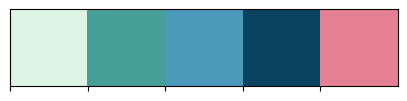

In [ ]:
# linear algebra
import numpy as np
import pandas as pd

#viz
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


import warnings
warnings.filterwarnings("ignore")

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]
print('THEME')
sns.palplot(sns.color_palette(theme))

<h2>Content</h2>

<ol>
<li><strong>pH value:</strong>
<code>PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.</code></li>
<li><strong>Hardness:</strong>
<code>Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.</code></li>
<li><strong>Solids (Total dissolved solids - TDS):</strong>
<code>Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.</code></li>
<li><strong>Chloramines:</strong>
<code>Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.</code></li>
<li><strong>Sulfate:</strong>
<code>Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.</code></li>
<li><strong>Conductivity:</strong>
<code>Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.</code></li>
<li><strong>Organic_carbon:</strong>
<code>Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA &lt; 2 mg/L as TOC in treated / drinking water, and &lt; 4 mg/Lit in source water which is use for treatment.</code></li>
<li><strong>Trihalomethanes:</strong>
<code>THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.</code></li>
<li><strong>Turbidity:</strong>
<code>The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.</code></li>
<li><strong>Potability:</strong>
<code>Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.</code></li>
</ol>

<a id="2"></a>
# <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#0B2F46"> 💽 Importing DataSet_ </span>


In [ ]:
water_df = pd.read_csv('water_potability.csv')

In [ ]:
print('****'*10)
print(f'Dataframe has {water_df.shape[0]} Rows, {water_df.shape[1]} Columns')
print('****'*10)

water_df.head().style.set_properties(**{'background-color': '#A2DBFA',
                                    'color': 'black',
                                    'border': '1.5px  solid black'}).bar(color='#F3F1F5',
                                                                         vmin=100_000,
                                                                         subset=['Potability'])

****************************************
Dataframe has 3276 Rows, 10 Columns
****************************************


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,nan,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,nan,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,nan,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_df.fillna(water_df.mean(), inplace=True)
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water_df.describe().T.style.bar(subset=['mean'], color='#E68193')\
                            .background_gradient(subset=['std'], cmap='mako_r')\
                             .background_gradient(subset=['50%'], cmap='mako')

,count,mean,std,min,25%,50%,75%,max
ph,3276.000000,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.000000,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.000000,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


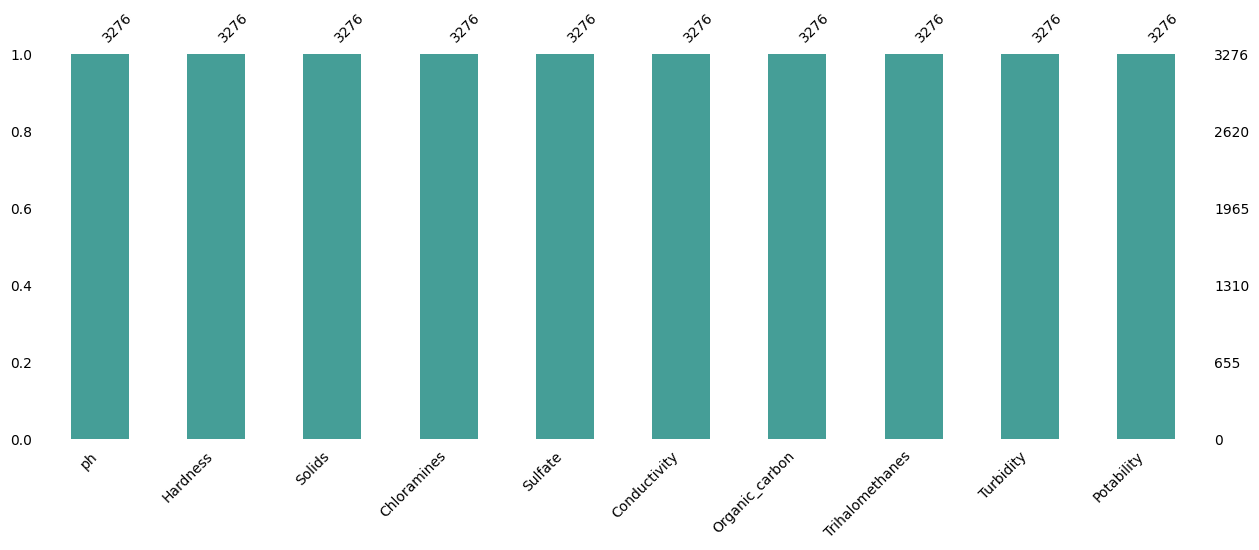

In [ ]:
msno.bar(water_df,figsize=(15, 5),fontsize=10,color = '#459E97');

* <span style="background:#DEF5E5; font-weight:bold; color:Black">Ph, Sulfate, Trihalomethanes </span> column has the missing values
* We will handle missing data on upcoming steps

<a id="3"></a>
# <center> <span style="font-family:Georgia"> <span style="color:white;font-weight:bold"> <span style="background:#0B2F46"> 📈 Exploratory Data Analysis_ </span>

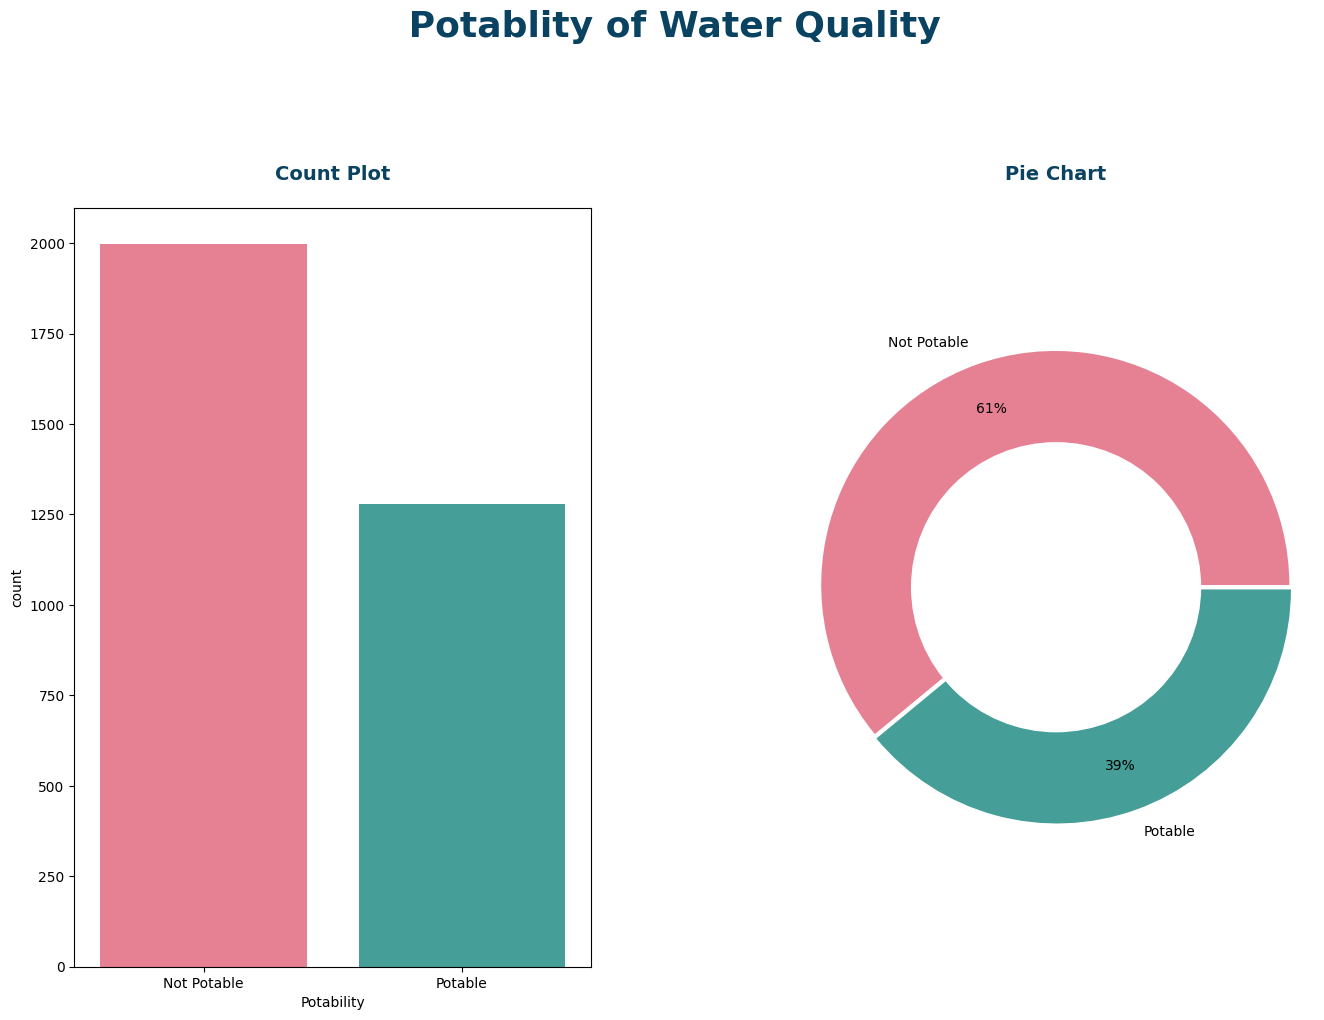

In [ ]:
#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 11))
fig.suptitle(' Potablity of Water Quality ', size = 26, color = theme[3], weight='bold')
axs = [ax1, ax2]

# Count-Plot
sns.countplot(
    x='Potability',
    data=water_df,
    ax=ax1,
    palette='husl'
)

ax1.set_title('Count Plot', size=14, color=theme[3], weight='bold', pad=20)
ax1.set_xticklabels(['Not Potable', 'Potable'])



#Data-2
names = ["Not Potable", "Potable"]
values = water_df['Potability'].value_counts()
colors = ["#E68193","#459E97"]
explode = (0.01, 0.01)

#Doughnut-chart
ax2.pie(x= values,labels =names, colors=colors,autopct='%1.0f%%', pctdistance=0.8,explode=explode)

#draw-circle
centre_circle = plt.Circle((0,0),0.62,fc='white')
ax2.add_artist(centre_circle)
ax2.axis('equal')

ax2.set_title('Pie Chart', size = 14, color = theme[3], weight='bold', pad=20)



plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.4, hspace=None);

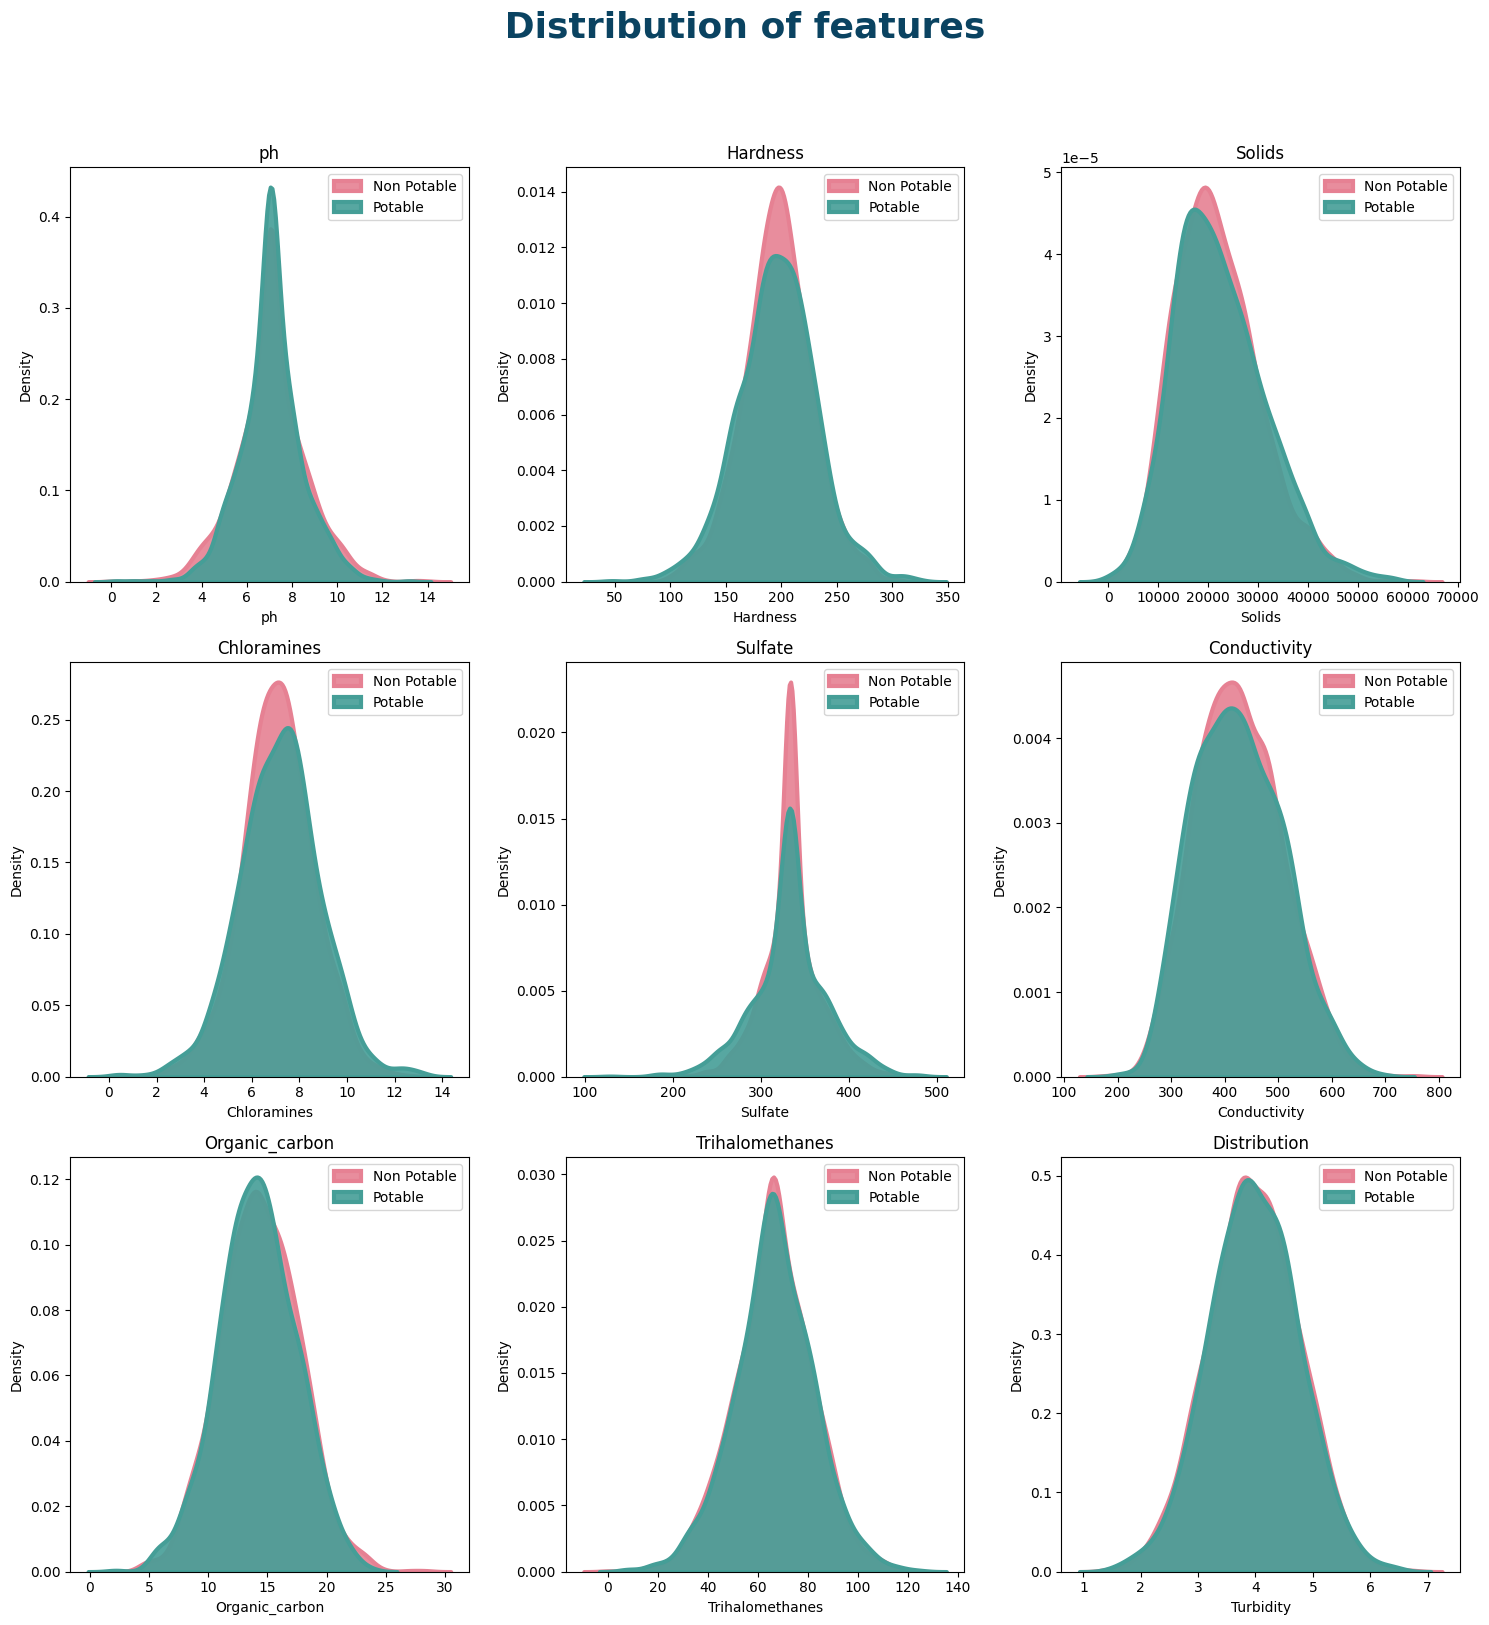

In [ ]:
non_potable = water_df.query("Potability == 0")
potable = water_df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(water_df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = non_potable[col], label = "Non Potable",fill=True, common_norm=False, color="#E68193",alpha=.9, linewidth=3)
    plotting = sns.kdeplot(x = potable[col], label = "Potable",fill=True, common_norm=False, color="#459E97",alpha=.9, linewidth=3)
    plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of features ',y=1.08, size = 26, color = theme[3], weight='bold');

Text(0.5, 1.08, 'Water Quality')

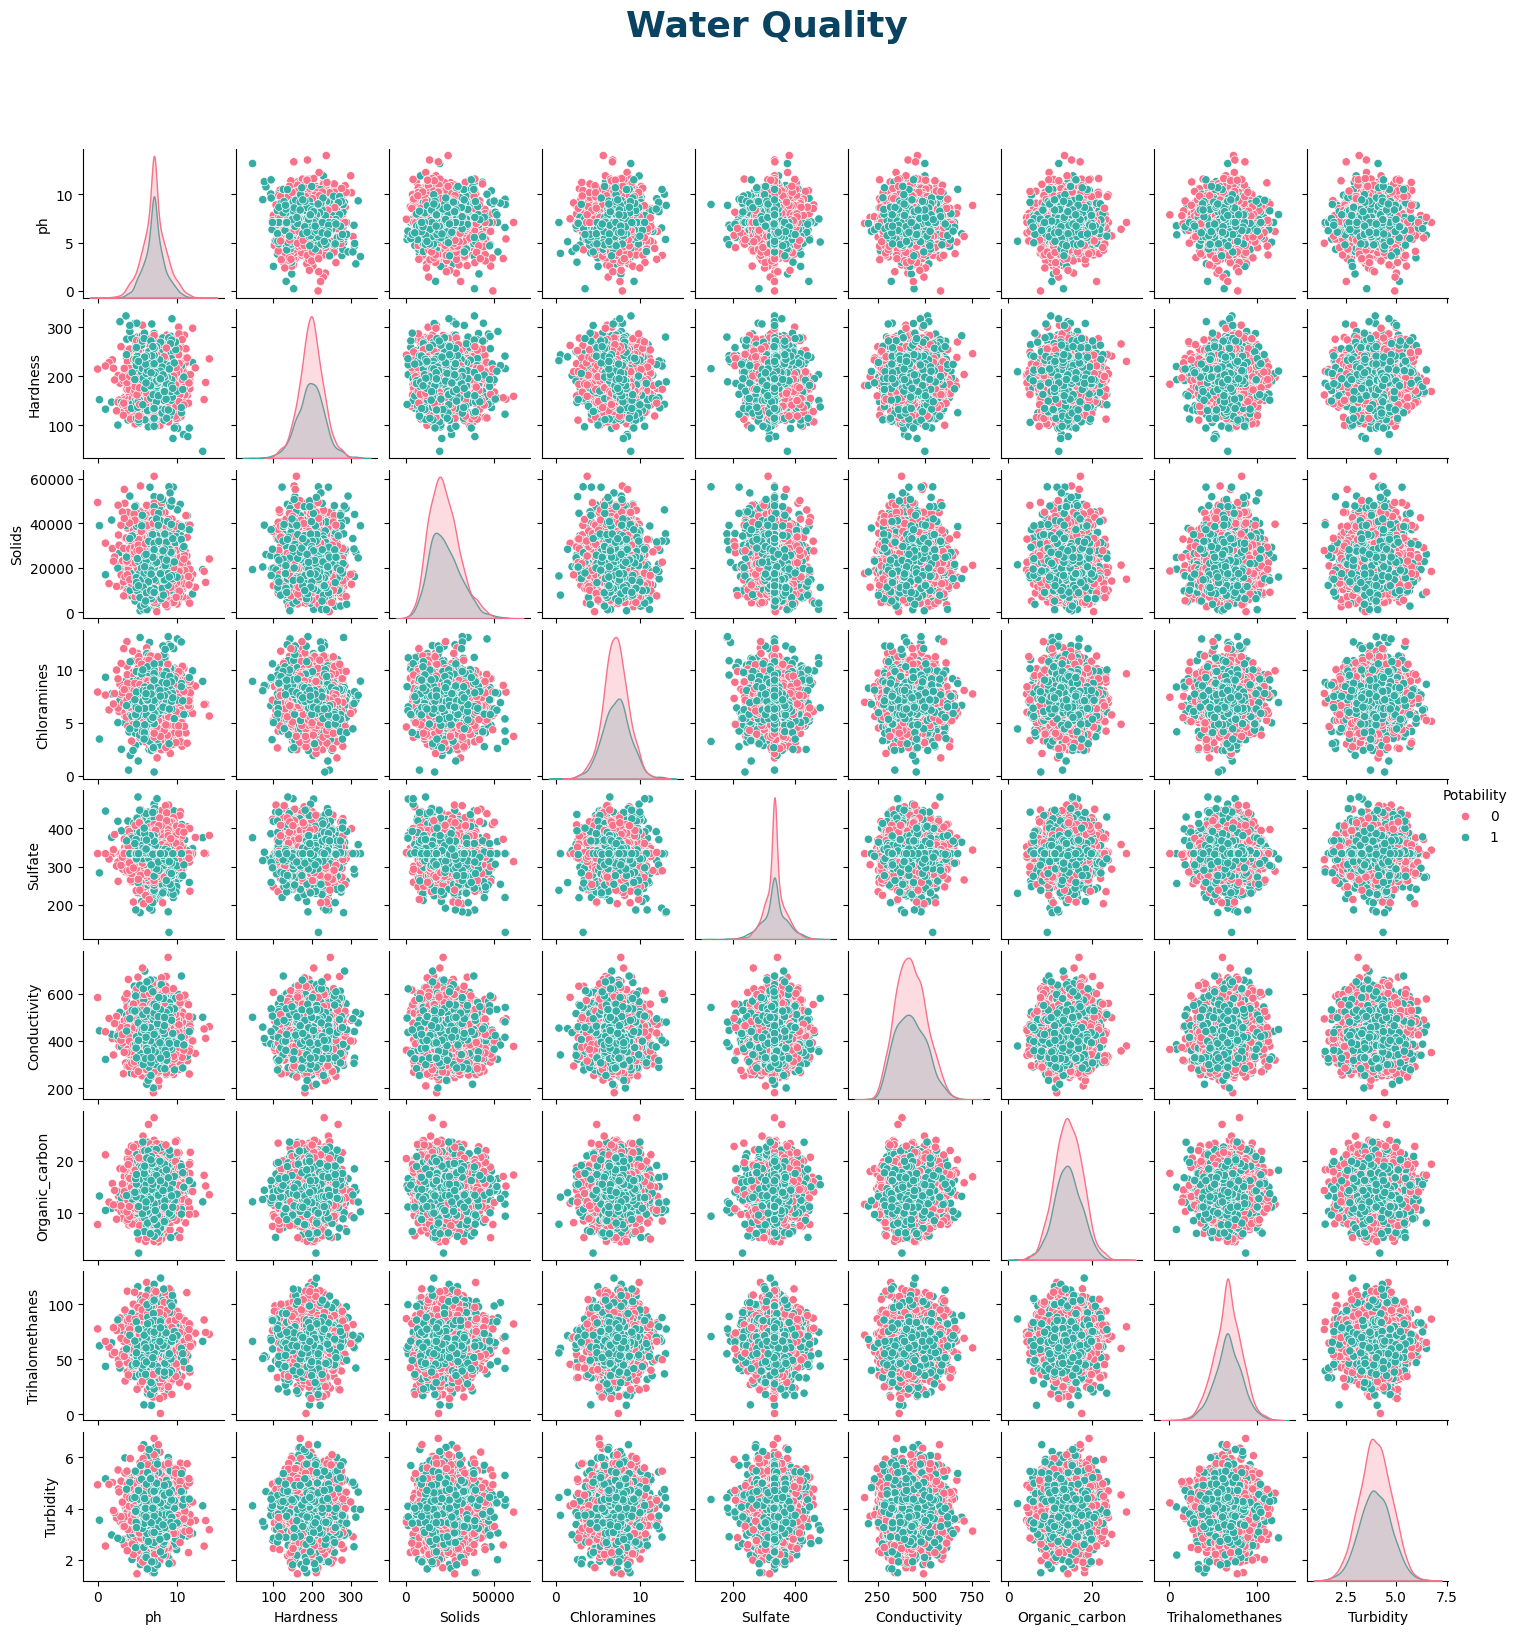

In [ ]:
ax = sns.pairplot(water_df ,hue = "Potability",diag_kind = "kde",kind = "scatter",palette = "husl")
ax.fig.set_size_inches(15,15)
ax.fig.suptitle('Water Quality',y=1.08, size = 26, color = theme[3], weight='bold')

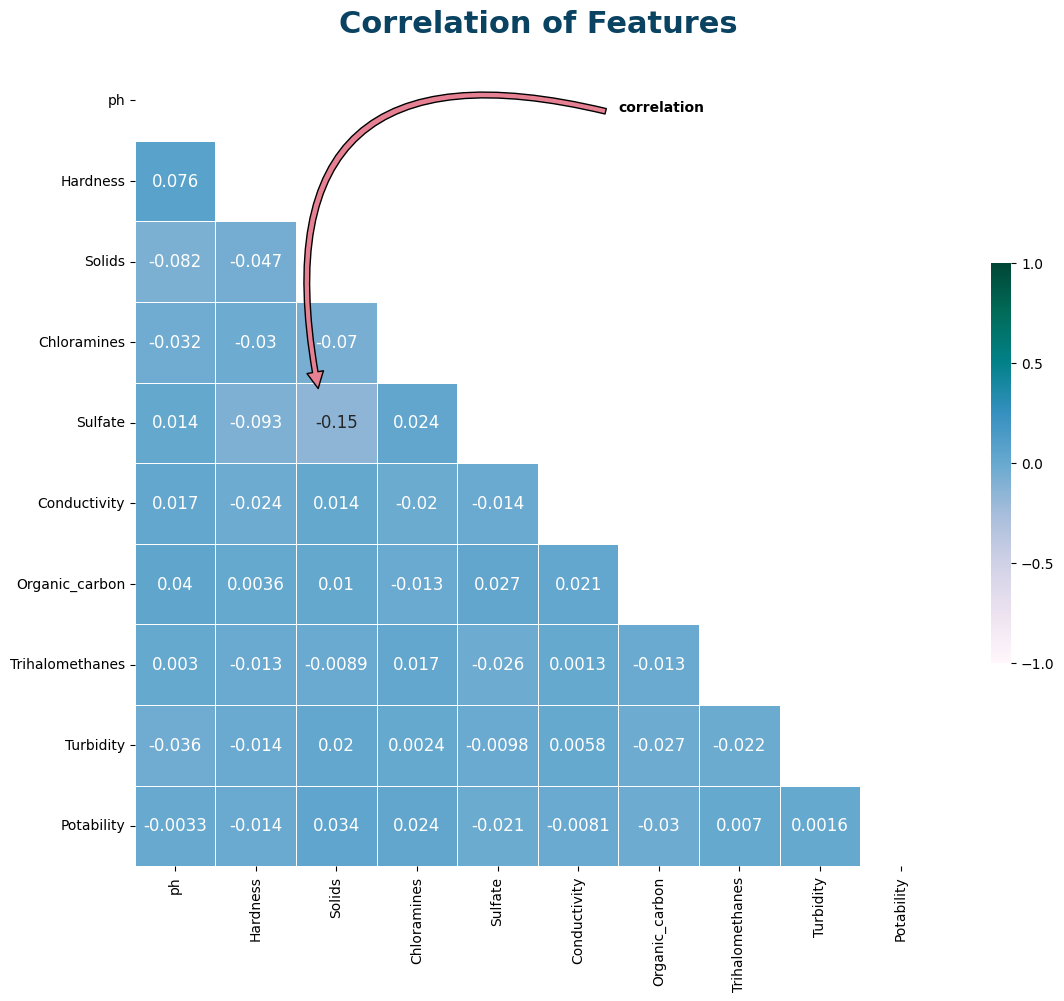

In [ ]:
mask = np.zeros_like(water_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


fig, ax = plt.subplots(figsize=(13, 13))

heatmap = sns.heatmap(water_df.corr(),
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'PuBuGn',
                      cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(water_df.corr(), rotation = 0)
ax.set_xticklabels(water_df.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ax.annotate('correlation',
                    fontsize=10,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Correlation of Features', size = 22, color = theme[3], weight='bold', pad=20)

plt.show()



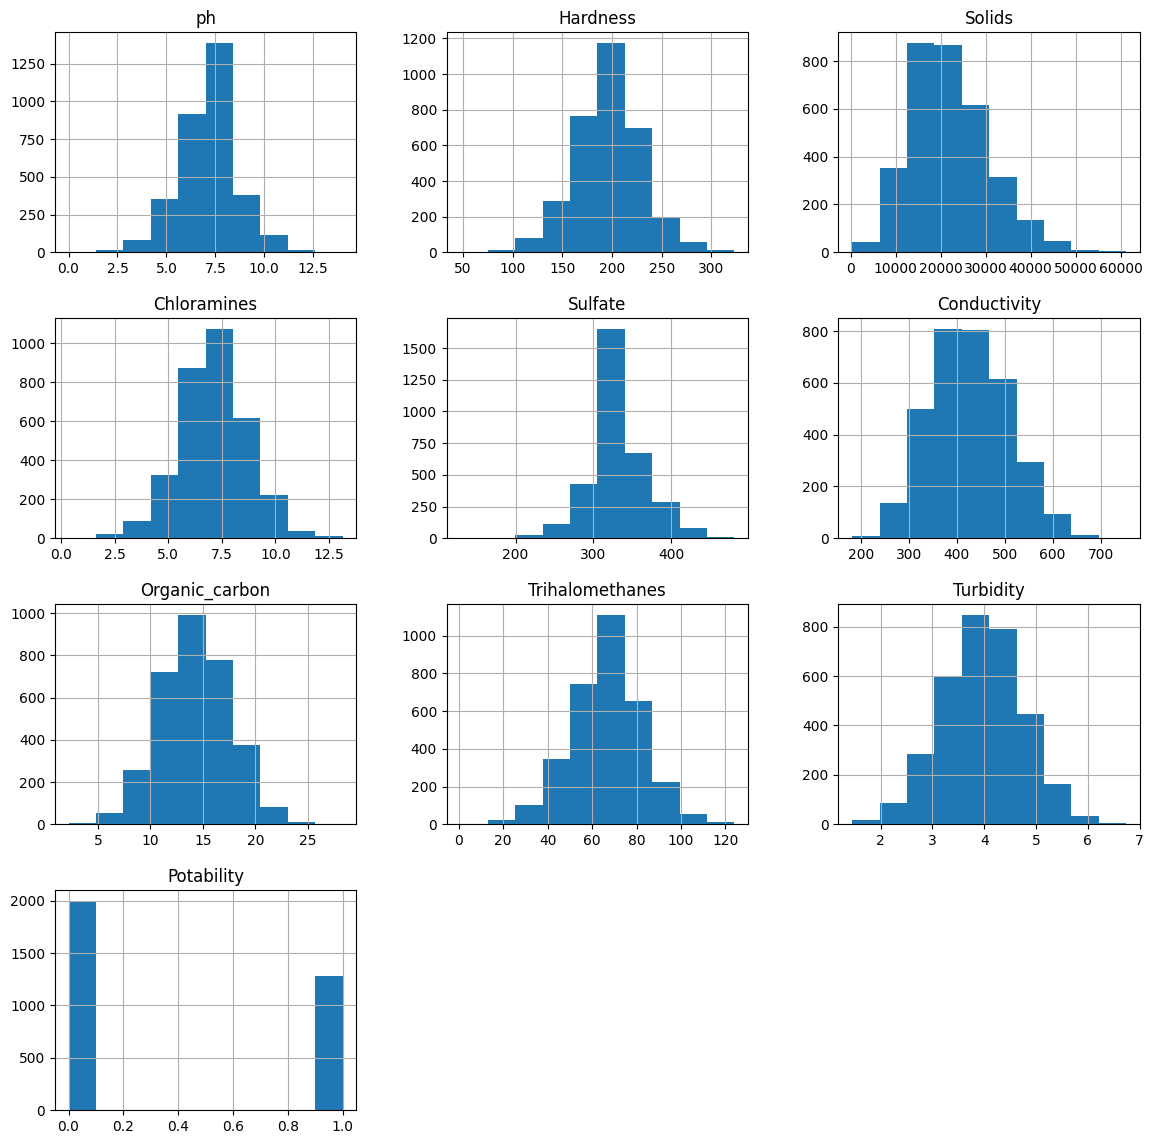

In [ ]:
water_df.hist(figsize=(14,14))
plt.show()

<Axes: >

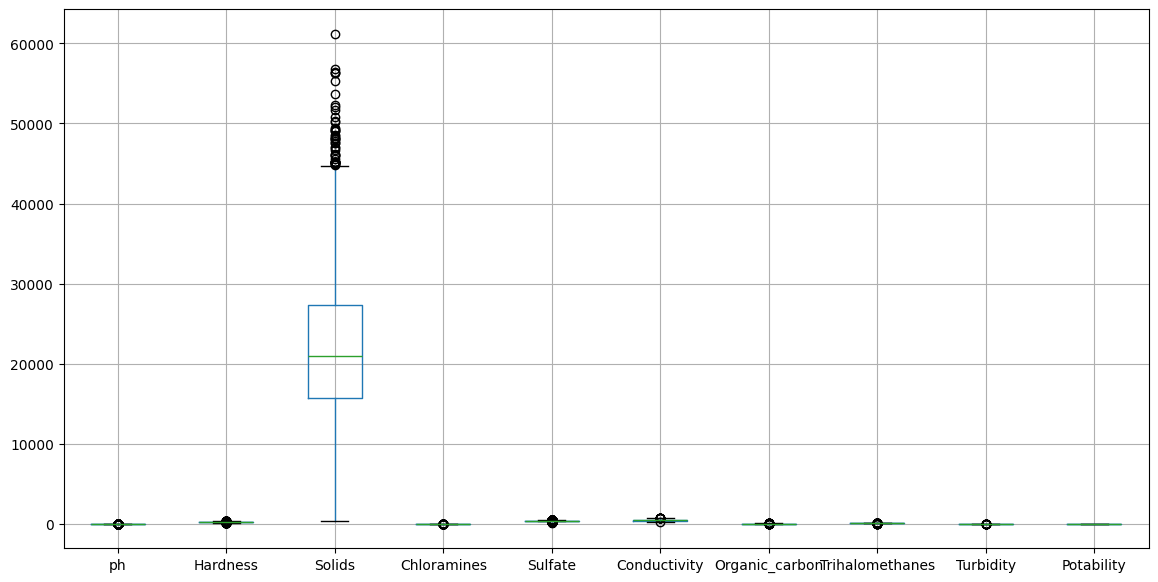

In [ ]:
water_df.boxplot(figsize=(14,7))


In [ ]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv("bangalore-rain.csv")

# Extract total rainfall column
total_rainfall = df["Total"]

# Calculate mean total rainfall
mean_rainfall = stats.tmean(total_rainfall)

print("Mean Total Rainfall:", mean_rainfall)


Mean Total Rainfall: 958.6967479674796


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("bangalore-rain.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))

df.info()

# Features and target
X = df.drop(columns=["Total"])   # replace if your column name differs
y = df["Total"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = LinearRegression()

# Train (this will now work)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Results")
print("----------------------------")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

results = pd.DataFrame({
    "Actual Rainfall": y_test.values,
    "Predicted Rainfall": y_pred
})

print("\n📈 Actual vs Predicted Rainfall (first 10 rows)")
print(results.head(10))

model.fit(X_train, y_train)
# Model parameters
coefficients = model.coef_
intercept = model.intercept_

model_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})

print("🔢 Linear Regression Model Parameters")
print("-----------------------------------")
print("Intercept:", intercept)
print(model_df)

original_coeffs = coefficients / scaler.scale_
original_intercept = intercept - np.sum(
    (coefficients * scaler.mean_) / scaler.scale_
)

original_model = pd.DataFrame({
    "Feature": X.columns,
    "Original Coefficient": original_coeffs
})

print("📐 Model in Original Feature Scale")
print("Intercept:", original_intercept)
print(original_model)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    123 non-null    int64  
 1   Jan     123 non-null    float64
 2   Feb     123 non-null    float64
 3   Mar     123 non-null    float64
 4   Apr     123 non-null    float64
 5   May     123 non-null    float64
 6   June    123 non-null    float64
 7   July    123 non-null    float64
 8   Aug     123 non-null    float64
 9   Sept    123 non-null    float64
 10  Oct     123 non-null    float64
 11  Nov     123 non-null    float64
 12  Dec     123 non-null    float64
 13  Total   123 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.6 KB
📊 Model Evaluation Results
----------------------------
Mean Squared Error (MSE): 15.176329383265102
Root Mean Squared Error (RMSE): 3.8956808626047774
R² Score: 0.9997120521910011

📈 Actual vs Predicted Rainfall (first 10 rows)
   Actual Rainfall  Pr

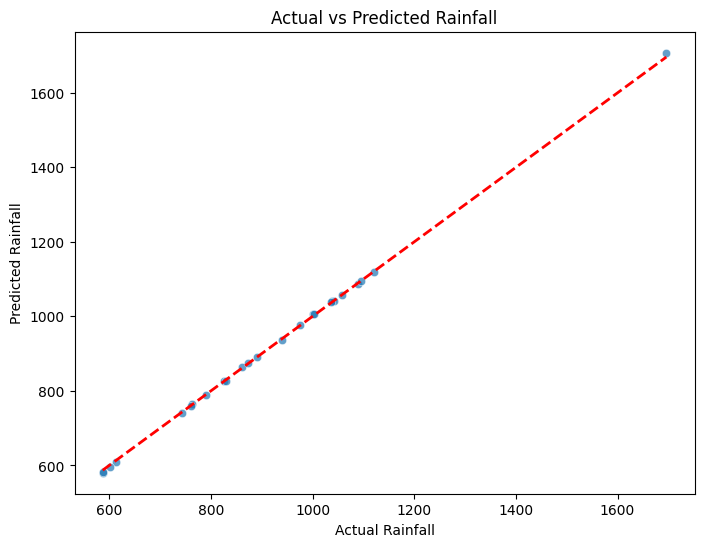

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--',
    linewidth=2
)

plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()


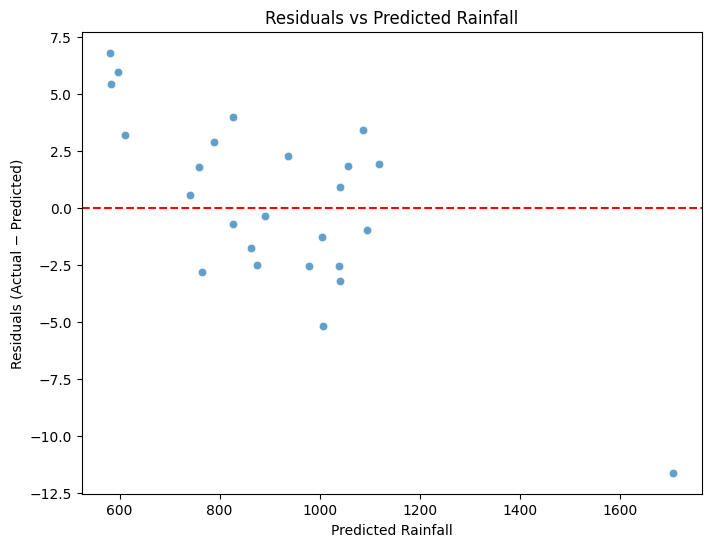

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Rainfall")
plt.ylabel("Residuals (Actual − Predicted)")
plt.title("Residuals vs Predicted Rainfall")
plt.show()


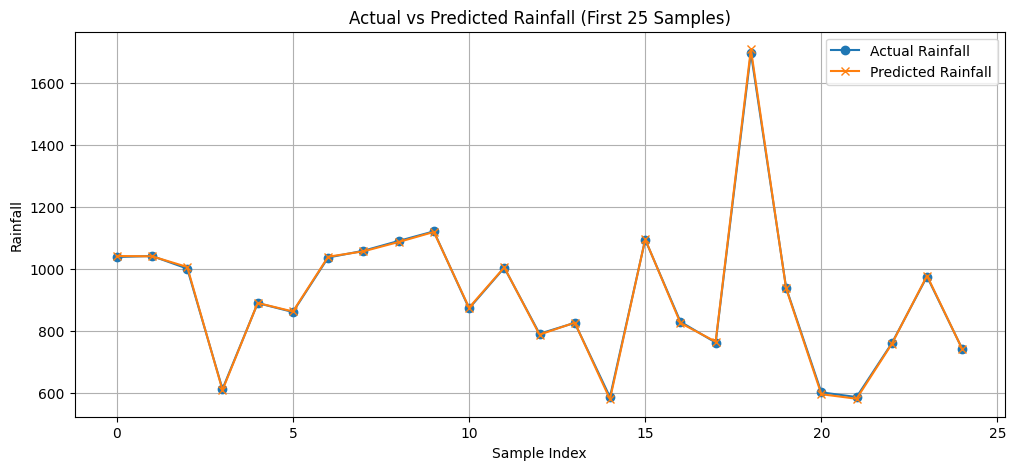

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(y_test.values[:25], label="Actual Rainfall", marker='o')
plt.plot(y_pred[:25], label="Predicted Rainfall", marker='x')

plt.title("Actual vs Predicted Rainfall (First 25 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall")
plt.legend()
plt.grid(True)
plt.show()


##